# About the data

The dataset I chose studied MRI-produced images of breast tumors, specifically triple negative breast cancer and ER-positive cancer. The paper claimed that while different characteristics of triple negative breast cancers have been described previously, information regarding tumor location was minimal. Therefore, they focused on identifying 3D coordinates associated with each tumor type, which were used to characterize medial-lateral and anterior-posterior categories as well as a quadrant system within the breast. They also acquired data such as mammographic density, histological grade, and tumor size.

Overall, the data was very useable, as the data was already mostly in tidy format. I did have to rename some columns to remove any spaces or hyphens, and converted everything to underscores. The excel table included a description of the variables in the column name (ie the subtype's column name included information that ER positive corresponds to 1 and triple negative breast cancer corresponds to 3). However, nothing in the excel file indicates how the x, y, and z coordinates were normalized or used to determine medial-lateral or anterior-posterior categories. The paper does explicitly state these, which was used as my basis for determining normalized y-axis distance as a more detailed proxy for AP location for my anterior/posterior-based questions. More detail about the cutoffs used in each distance variable to determine location categories would have been very useful to reusing this data.

# Report 1: Relationship between mammographic density and tumor subtype in tumors located centrally along the anterior-posterior axis, and the relationship between tumor subtype and y-distance in the largest and smallest tumors

This report will focus on the following two questions: 

1. If looking at just the "middle" data along the anterior-posterior axis, how does the mammographic density vary by tumor subtype?

    This question was chosen because the paper describes an association between triple-negative breast cancers and tumor location (stating that they are commonly found in posterior or prepectoral locations). It also describes an assocation between mammographic density and a posterior location. Therefore, tumor subtype, mammographic density, and location are linked, at least among posterior tumors. If this were to be examined exclusively in tumors located elsewhere, such as in the middle of the anterior-posterior axis, how does this relationship vary? Therefore, I have chosen to look at mammographic density in tumors located in the middle, as sorted by tumor subtype (either triple negative breast cancer or ER-positive tumors).


2. Does the relationship between anterior-posterior location and tumor subtype change or become more pronounced when looking at the largest and smallest extremes (top and bottom 10%, respectively) of tumor size within each tumor subtype?

    As described above, the paper states that triple negative breast cancers are typically found in more posterior locations in the breast. They also find that triple negative breast cancer tumors tend to have a larger size. Therefore, I became curious if the relationship between location along the anterior-posterior axis and tumor subtype was altered if looking exclusively at large and small tumors. 

In [1]:
#Initialize the notebook to have some basic packages
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Import in the data file and convert it into a Pandas dataframe
tnbc=pd.read_excel("tumor_location_raw_data_final.xls")
tnbc_df=pd.DataFrame(tnbc)
tnbc_df.head()

,ID,Size_Pathol_cm_,Subtype_1_ER_positive_3_triple_negative,Qudrants2_1_UOQ_2_UIQ_3_LOQ_4_LIQ_5_periareolar_6___overlapping,MR_Location_ML__1__medial_2__central_3__lateral_,MR_Location_AP__1__anterior_2__middle_3__posterior_,Y_distance,X_normalized,Y_normalized,Z_normalized,MG_grade,X_distance,Z_distance,Palpability,Histologic_full
0,1,1.5,1,2,2,2,1.7,0.0,0.2,0.2,3,-0.3,2.7,0,2
1,2,3.0,1,2,2,3,0.1,0.0,0.0,0.5,3,-0.4,6.7,1,2
2,3,1.6,1,1,2,2,3.9,0.0,0.4,0.1,3,0.2,1.2,1,2
3,4,1.8,1,5,2,2,3.5,0.0,0.4,0.0,3,-0.3,-0.6,0,2
4,5,3.0,1,1,2,3,0.3,-0.1,0.1,0.0,4,-0.5,0.5,1,2


# Question 1:
This paper finds triple-negative breast cancers have a tendency toward a posterior or prepectoral location; they also note an association between mammographic density and posterior location. 
If looking at just the "middle" data along the anterior-posterior axis, how does the mean mammographic density vary by tumor subtype?

In [4]:
#Q1 continued
#I need to start by subsetting my dataframe to just the subtype, AP location column, and the MG_grade column. 
#Referenced https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/index.html
tnbc_df_subset1=tnbc_df[['Subtype_1_ER_positive_3_triple_negative', 'MR_Location_AP__1__anterior_2__middle_3__posterior_','MG_grade']]
tnbc_df_subset1

,Subtype_1_ER_positive_3_triple_negative,MR_Location_AP__1__anterior_2__middle_3__posterior_,MG_grade
0,1,2,3
1,1,3,3
2,1,2,3
3,1,2,3
4,1,3,4
...,...,...,...
1097,1,3,2
1098,1,3,1
1099,3,2,3
1100,1,3,4


In [5]:
#Q1 Continued
#From there, I will need to keep only rows that contain the value "2" in the AP location column.
tnbc_df_subset1_AP2= tnbc_df_subset1.loc[tnbc_df_subset1['MR_Location_AP__1__anterior_2__middle_3__posterior_'] == 2]
tnbc_df_subset1_AP2

,Subtype_1_ER_positive_3_triple_negative,MR_Location_AP__1__anterior_2__middle_3__posterior_,MG_grade
0,1,2,3
2,1,2,3
3,1,2,3
5,3,2,3
8,1,2,3
...,...,...,...
1088,1,2,3
1089,1,2,2
1094,3,2,3
1096,3,2,2


In [6]:
#Q1 continued
#I will now also subset the dataframes by subtype for my own reference.
tnbc_df_subset1_AP2_ST1= tnbc_df_subset1_AP2.loc[tnbc_df_subset1_AP2['Subtype_1_ER_positive_3_triple_negative'] == 1]
tnbc_df_subset1_AP2_ST1

,Subtype_1_ER_positive_3_triple_negative,MR_Location_AP__1__anterior_2__middle_3__posterior_,MG_grade
0,1,2,3
2,1,2,3
3,1,2,3
8,1,2,3
9,1,2,2
...,...,...,...
1080,1,2,4
1081,1,2,2
1083,1,2,3
1088,1,2,3


In [7]:
#Q1 continued
tnbc_df_subset1_AP2_ST3= tnbc_df_subset1_AP2.loc[tnbc_df_subset1_AP2['Subtype_1_ER_positive_3_triple_negative'] == 3]
tnbc_df_subset1_AP2_ST3

,Subtype_1_ER_positive_3_triple_negative,MR_Location_AP__1__anterior_2__middle_3__posterior_,MG_grade
5,3,2,3
12,3,2,3
16,3,2,1
24,3,2,1
27,3,2,2
...,...,...,...
1064,3,2,3
1085,3,2,3
1094,3,2,3
1096,3,2,2


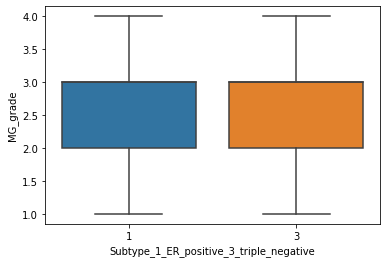

In [8]:
#Q1 continued
#I will now make boxplots to visualize the average value as well as any overall variation
#Referenced https://seaborn.pydata.org/generated/seaborn.boxplot.html
ax = sns.boxplot(x="Subtype_1_ER_positive_3_triple_negative", y="MG_grade", data=tnbc_df_subset1_AP2);
plt.savefig('Q1BothSubtypes.png')

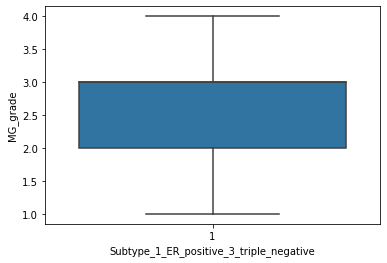

In [9]:
#Q1 continued
#Since the two boxplots look identical, I will now split this up by subtype using the subsets I previously made.
ax = sns.boxplot(x="Subtype_1_ER_positive_3_triple_negative", y="MG_grade", data=tnbc_df_subset1_AP2_ST1);
plt.savefig('Q1Subtype1.png')

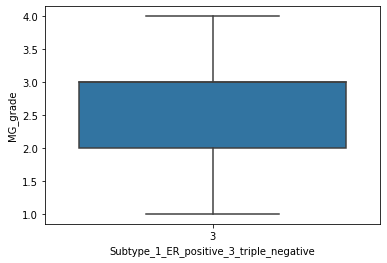

In [10]:
#Q1 continued
ax = sns.boxplot(x="Subtype_1_ER_positive_3_triple_negative", y="MG_grade", data=tnbc_df_subset1_AP2_ST3);
plt.savefig('Q1Subtype3.png')

In [11]:
#Q1 continued
#Each individual graph also matches, meaning that my original combined boxplot was correct. 
#Therefore, there is no difference in how the mean mammographic density varies between tumor subtype, when looking at
#the "middle" section of the anterior-posterior axis.

## Question 1 Summary
In question 1, I filtered the data such that I was only looking at tumors located in the middle of the anterior posterior axis, as defined as a value of "2" in that corresponding column. I decided to visualize my data using a boxplot, as I was looking specifically at the mean, which is represented by the center of the box plot, but wanted additional information regarding data distribution in case other differences were obvious. When using a boxplot to look at the distribution of the mammographic density by tumor subtype of these tumors, both distributions looked identical in each way, including the mean. Therefore, there is no difference in how the mean mammographic density (or the distribution of the data as a whole).

# Question 2: 
The paper focuses on relationship between anterior-posterior location and tumor subtype. Does this change or become more pronounced when looking exclusively at the largest and smallest extremes  (top and bottom 10%, respectively) of tumor size within each tumor subtype?

In [13]:
#Q2 continued
#For this quesstion, I will start by subsetting my dataset to include the tumor subtype, 
#tumor size, and y_normalized. I will use y_normalized instead of AP location since it is a continuous value, 
#while AP has been assigned a value of 1, 2, or 3. 
tnbc_df_subset2=tnbc_df[['Subtype_1_ER_positive_3_triple_negative', 'Size_Pathol_cm_', 'Y_normalized']]
tnbc_df_subset2

,Subtype_1_ER_positive_3_triple_negative,Size_Pathol_cm_,Y_normalized
0,1,1.5,0.2
1,1,3.0,0.0
2,1,1.6,0.4
3,1,1.8,0.4
4,1,3.0,0.1
...,...,...,...
1097,1,NaN,0.2
1098,1,NaN,0.2
1099,3,NaN,0.3
1100,1,NaN,0.0


In [14]:
#Q2 continued
#Since I see NaNs in the previous output, 
#and I have had a lot of issues with missing values previously, I will drop rows with missing values.
tnbc_df_subset2_drop = tnbc_df_subset2.dropna()
tnbc_df_subset2_drop

,Subtype_1_ER_positive_3_triple_negative,Size_Pathol_cm_,Y_normalized
0,1,1.5,0.2
1,1,3.0,0.0
2,1,1.6,0.4
3,1,1.8,0.4
4,1,3.0,0.1
...,...,...,...
1019,3,2.5,0.2
1020,3,1.7,0.1
1021,3,2.0,0.2
1022,1,4.5,0.0


In [15]:
#Q2 continued
#I will now identify the top and bottom 10% of the tumor size column, and sort it as a sanity check.
#Top10 of size we need any values greater than the 90th%, bottom 10 of size we need any values smaller than the 10th%.
top10q2= tnbc_df_subset2_drop[tnbc_df_subset2_drop.Size_Pathol_cm_ > tnbc_df_subset2_drop.Size_Pathol_cm_.quantile(.90)]
top10q2
top10q2.sort_values(by=['Size_Pathol_cm_'], ascending=False)

,Subtype_1_ER_positive_3_triple_negative,Size_Pathol_cm_,Y_normalized
214,1,11.8,0.0
357,1,9.8,0.1
286,3,9.3,0.2
51,1,9.0,0.3
989,3,9.0,0.5
...,...,...,...
614,1,4.2,0.5
464,1,4.2,0.4
860,1,4.2,0.0
561,1,4.2,0.1


In [16]:
#Q2 continued
bott10q2= tnbc_df_subset2_drop[tnbc_df_subset2_drop.Size_Pathol_cm_ < tnbc_df_subset2_drop.Size_Pathol_cm_.quantile(.10)]
bott10q2
bott10q2.sort_values(by=['Size_Pathol_cm_'], ascending=True)

,Subtype_1_ER_positive_3_triple_negative,Size_Pathol_cm_,Y_normalized
713,3,0.2,0.0
103,1,0.2,0.5
709,1,0.3,0.1
124,1,0.4,0.4
975,3,0.5,0.1
871,1,0.5,0.2
758,1,0.5,0.5
395,1,0.5,0.3
577,1,0.5,0.4
532,1,0.5,0.8


In [17]:
#Q2 Continued
#This sorts the entire drop dataset by tumor size, with a preview of smallest and largest. 
#It will be able to sanity check both percentiles I found.
tnbc_df_subset2_drop.sort_values(by=['Size_Pathol_cm_'])

,Subtype_1_ER_positive_3_triple_negative,Size_Pathol_cm_,Y_normalized
713,3,0.2,0.0
103,1,0.2,0.5
709,1,0.3,0.1
124,1,0.4,0.4
943,1,0.5,0.1
...,...,...,...
989,3,9.0,0.5
51,1,9.0,0.3
286,3,9.3,0.2
357,1,9.8,0.1


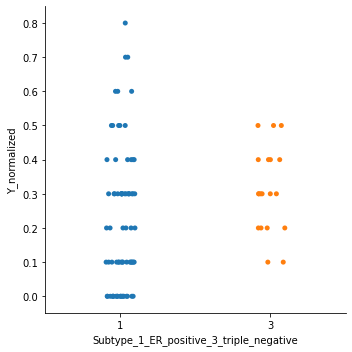

In [18]:
#Q2 continued
import scipy 
#Now, I will determine the relationship between Y_normalized and subtype within these two subsets.
#This first graph represents the top 10th percentile of tumor size.
sns.catplot(x='Subtype_1_ER_positive_3_triple_negative',y='Y_normalized', data=top10q2);
plt.savefig('Q2Top10.png')

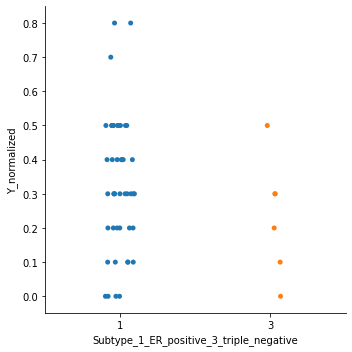

In [19]:
#Q2 continued
#This second graph represents the bottom 10th percentile of tumor size.
sns.catplot(x='Subtype_1_ER_positive_3_triple_negative',y='Y_normalized', data=bott10q2);
plt.savefig('Q2Bottom10.png')

In [20]:
#Q2 continued
#Both plots show that ER positive tumors (subtype 1) have a much wider spread of normalized y distances 
#than TNBC tumors (subtype 3). I will now determine the mean to get a more exact idea of differences in y distances.
#I will start by creating a subset of the top and bottom 10th percentiles that each contain only subtype 1 or 3.
top10q2_ST3= top10q2.loc[top10q2['Subtype_1_ER_positive_3_triple_negative'] == 3]
top10q2_ST1= top10q2.loc[top10q2['Subtype_1_ER_positive_3_triple_negative'] == 1]
bott10q2_ST3= bott10q2.loc[bott10q2['Subtype_1_ER_positive_3_triple_negative'] == 3]
bott10q2_ST1= bott10q2.loc[bott10q2['Subtype_1_ER_positive_3_triple_negative'] == 1]

In [21]:
#Q2 continued
#I will now find the mean for each of these subsets.
print("The Y_normalized mean for the top 10th percentile sized-tumors that are subtype 3 is", top10q2_ST3['Y_normalized'].mean() )
print("The Y_normalized mean for the top 10th percentile sized-tumors that are subtype 1 is", top10q2_ST1['Y_normalized'].mean() )
print("The Y_normalized mean for the bottom 10th percentile sized-tumors that are subtype 3 is",bott10q2_ST3['Y_normalized'].mean() )
print("The Y_normalized mean for the bottom 10th percentile sized-tumors that are subtype 1 is",bott10q2_ST1['Y_normalized'].mean() )

The Y_normalized mean for the top 10th percentile sized-tumors that are subtype 3 is 0.31052631578947365
The Y_normalized mean for the top 10th percentile sized-tumors that are subtype 1 is 0.22702702702702704
The Y_normalized mean for the bottom 10th percentile sized-tumors that are subtype 3 is 0.23333333333333336
The Y_normalized mean for the bottom 10th percentile sized-tumors that are subtype 1 is 0.32888888888888884


In [22]:
#A higher value y-normalized is a higher normalized y-axis distance from the chest wall. 
#Overall, they found a shorter normalized y-axis distance in TNBC tumors as compared to ER-positive
#Here, I show that the smallest tumors follow this trend, as represented by comparing the means for the bottom 10th 
#percentile of tumor size. However, this trend is reversed in the largest sized tumors, as the mean for the top 10th
#percentile sized tumors is larger for subtype 3 than subtype 1.

## Question 2 Summary

In Question 2, I began by identifying the top and bottom 10th percentile of tumor size, and kept only the rows that corresponded with each category. Since I wanted to generally look at the relationship between anterior-posterior location and tumor subtype, I decided to use a catplot so I could visualize, by subtype, the distribution of points along y-axis locations. Y-axis normalized distance was chosen to represent anterior-posterior location since the authors used that variable to define the anterior-posterior location categories, but the y-axis normalized distance retains more detail regarding specific location along that axis. I found that ER-positive tumors had a wider spread of y-normalized distances they were found along as compared to triple negative breast tumors. I decided to take the mean of the y-normalized distance to further characterize this relationship, as the oriignal authors found a smaller mean normalized y-axis distance in triple negative breast cancers as comapred to ER-positive tumors. I found that the smallest tumors follow this original trend, as represented by comparing the means for the bottom 10th percentile of tumor size. However, this trend is reversed in the largest sized tumors, as the mean for the top 10th percentile sized tumors is larger for subtype 3 than subtype 1.